In [1]:
from horseshoe_gibbs import sample_gibbs, sample_gibbs_improved, sample_gibbs_job
import torch
import matplotlib.pyplot as plt
from itertools import product

# import scienceplots
# scienceplots.plt.style.use(["science"])

In [2]:
n = 100
p = 100
max_mcs = 5000

torch.manual_seed(0)
X = torch.randn(n, p)
w = torch.randn(p) * torch.bernoulli(torch.ones(p) * 0.1)
y = X @ w + torch.randn(n) * 0.1

In [3]:
torch.manual_seed(0)

results_naive = sample_gibbs(X, y, max_mcs, n_warmup=0, debug=True)

X:  torch.Size([100, 100])
y:  torch.Size([100])
res:  2.471e+00 | beta:  1.983e-01 | sigma2:  3.502e+00 lamb2:  3.108e+00 | tau2:  2.995e-02
res:  4.487e-02 | beta:  6.800e-02 | sigma2:  1.294e-01 lamb2:  1.076e+02 | tau2:  3.861e-03
res:  1.058e-02 | beta:  6.368e-02 | sigma2:  2.375e-02 lamb2:  2.877e+03 | tau2:  1.265e-03
res:  1.160e-02 | beta:  6.271e-02 | sigma2:  2.083e-02 lamb2:  2.527e+04 | tau2:  2.696e-04
res:  9.169e-03 | beta:  6.254e-02 | sigma2:  2.604e-02 lamb2:  2.261e+04 | tau2:  3.221e-04
res:  1.068e-02 | beta:  6.123e-02 | sigma2:  1.623e-02 lamb2:  2.234e+04 | tau2:  2.630e-04
res:  1.089e-02 | beta:  6.231e-02 | sigma2:  1.905e-02 lamb2:  1.452e+04 | tau2:  2.960e-04
res:  1.253e-02 | beta:  6.111e-02 | sigma2:  2.026e-02 lamb2:  1.201e+04 | tau2:  2.132e-04
res:  1.370e-02 | beta:  6.304e-02 | sigma2:  2.059e-02 lamb2:  1.053e+04 | tau2:  4.870e-04
res:  1.108e-02 | beta:  6.332e-02 | sigma2:  2.033e-02 lamb2:  1.903e+03 | tau2:  9.069e-04
res:  1.245e-02 | bet

In [4]:
torch.manual_seed(0)

results_improved = sample_gibbs_improved(X, y, max_mcs, n_warmup=0, debug=True)

res:  1.165e+00 | beta:  1.437e-01 | sigma2:  1.291e+00 lamb2:  3.645e+00 | tau2:  2.995e-02
res:  1.101e-02 | beta:  6.429e-02 | sigma2:  1.899e-02 lamb2:  4.183e+02 | tau2:  6.927e-03
res:  9.681e-03 | beta:  6.372e-02 | sigma2:  1.862e-02 lamb2:  2.365e+03 | tau2:  1.959e-03
res:  1.127e-02 | beta:  6.277e-02 | sigma2:  1.874e-02 lamb2:  2.111e+04 | tau2:  3.584e-04
res:  8.644e-03 | beta:  6.250e-02 | sigma2:  2.227e-02 lamb2:  2.200e+04 | tau2:  3.882e-04
res:  1.079e-02 | beta:  6.137e-02 | sigma2:  1.649e-02 lamb2:  1.806e+04 | tau2:  3.199e-04
res:  1.102e-02 | beta:  6.248e-02 | sigma2:  1.987e-02 lamb2:  1.189e+04 | tau2:  3.468e-04
res:  1.295e-02 | beta:  6.125e-02 | sigma2:  2.200e-02 lamb2:  9.905e+03 | tau2:  2.381e-04
res:  1.501e-02 | beta:  6.339e-02 | sigma2:  2.426e-02 lamb2:  8.425e+03 | tau2:  5.168e-04
res:  1.100e-02 | beta:  6.352e-02 | sigma2:  2.107e-02 lamb2:  1.779e+03 | tau2:  9.349e-04
res:  1.201e-02 | beta:  6.274e-02 | sigma2:  2.172e-02 lamb2:  3.607e

In [8]:
torch.manual_seed(0)

results_job = sample_gibbs_job(X, y, max_mcs, n_warmup=0, stepsize_tau=0.1, debug=True)

mcs:   0 | res:  4.016e-02 | beta:  1.216e-01 | sigma2:  5.667e-02 lamb2:  4.992e+00 | tau2:  1.167e+00
mcs:  10 | res:  1.315e-02 | beta:  7.237e-02 | sigma2:  1.516e-02 lamb2:  9.152e+00 | tau2:  9.852e-01
mcs:  20 | res:  1.175e-02 | beta:  7.068e-02 | sigma2:  1.360e-02 lamb2:  3.131e+00 | tau2:  8.691e-01
mcs:  30 | res:  1.283e-02 | beta:  7.556e-02 | sigma2:  1.396e-02 lamb2:  1.653e+01 | tau2:  9.374e-01
mcs:  40 | res:  1.192e-02 | beta:  7.576e-02 | sigma2:  1.786e-02 lamb2:  2.521e+01 | tau2:  7.925e-01
mcs:  50 | res:  1.343e-02 | beta:  7.399e-02 | sigma2:  1.584e-02 lamb2:  1.203e+01 | tau2:  7.925e-01
mcs:  60 | res:  1.427e-02 | beta:  7.305e-02 | sigma2:  1.932e-02 lamb2:  9.237e+00 | tau2:  7.925e-01
mcs:  70 | res:  1.767e-02 | beta:  7.455e-02 | sigma2:  1.764e-02 lamb2:  1.026e+01 | tau2:  7.941e-01
mcs:  80 | res:  1.031e-02 | beta:  6.883e-02 | sigma2:  1.357e-02 lamb2:  2.173e+01 | tau2:  7.773e-01
mcs:  90 | res:  9.763e-03 | beta:  7.265e-02 | sigma2:  1.317e-

In [9]:
def RMSELoss(y: torch.Tensor, y_pred: torch.Tensor) -> torch.Tensor:
    y = y.reshape(-1, 1)
    if y_pred.ndim == 1:
        return torch.sqrt(torch.mean((y - y_pred) ** 2))
    return torch.sqrt(torch.mean((y - y_pred) ** 2, dim=0))

(
    beta_hist_naive,
    sigma2_hist_naive,
    tau2_hist_naive,
    lamb2_hist_naive,
) = results_naive

(
    beta_hist_improved,
    sigma2_hist_improved,
    tau2_hist_improved,
    lamb2_hist_improved,
) = results_improved

(
    beta_hist_job,
    sigma2_hist_job,
    tau2_hist_job,
    lamb2_hist_job,
) = results_job

sigma_hist_naive = torch.sqrt(sigma2_hist_naive)
y_estim_hist_naive = torch.einsum("ij,kj->ik", X, beta_hist_naive)
RMSE_naive = RMSELoss(y, y_estim_hist_naive)

sigma_hist_improved = torch.sqrt(sigma2_hist_improved)
y_estim_hist_improved = torch.einsum("ij,kj->ik", X, beta_hist_improved)
RMSE_improved = RMSELoss(y, y_estim_hist_improved)

sigma_hist_job = torch.sqrt(sigma2_hist_job)
y_estim_hist_job = torch.einsum("ij,kj->ik", X, beta_hist_job)
RMSE_job = RMSELoss(y, y_estim_hist_job)

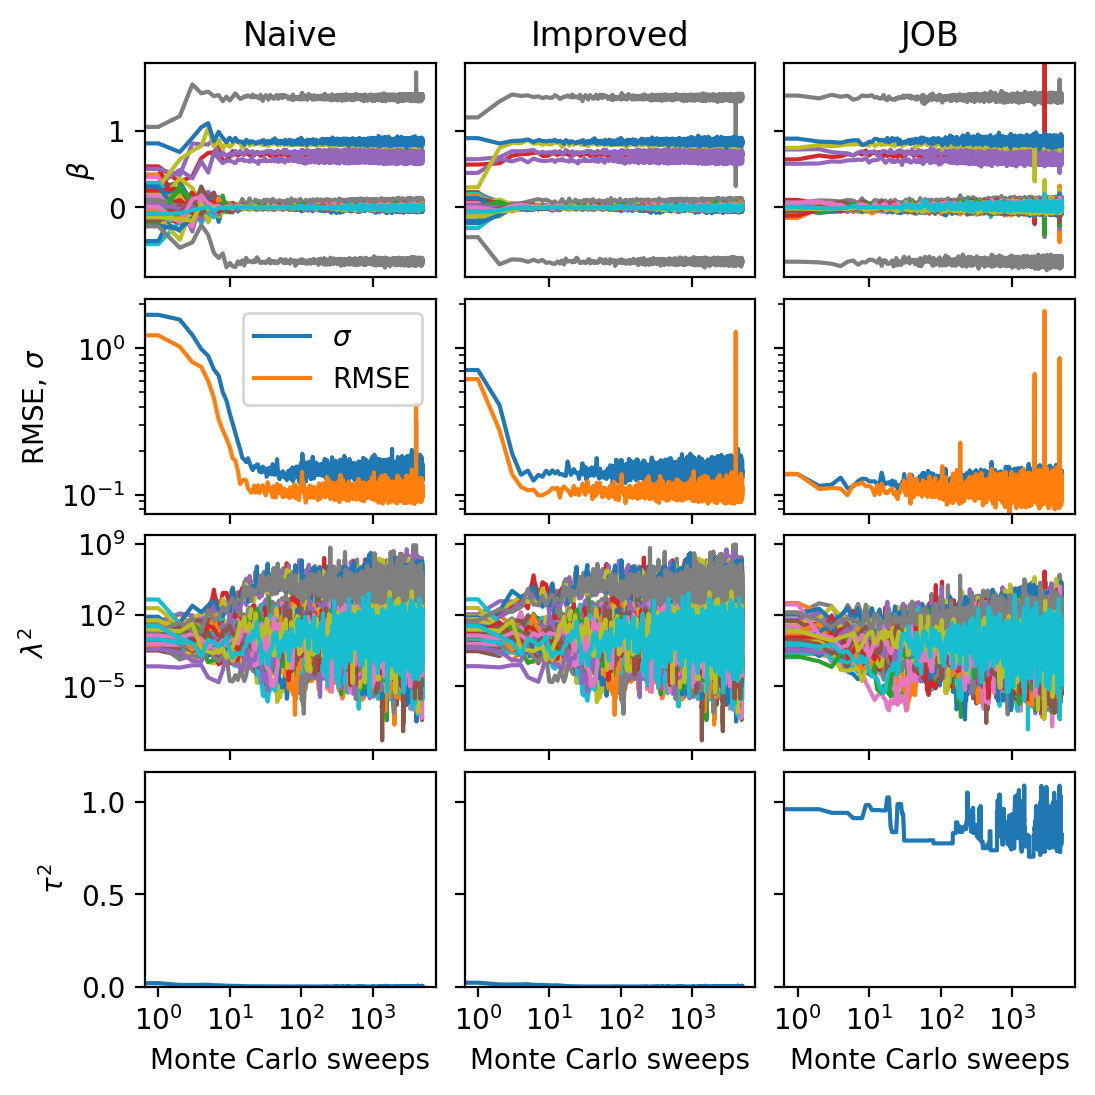

In [10]:
fig, axes = plt.subplots(4, 3, figsize=(6,6), dpi=200)
fig.subplots_adjust(hspace=0.1, wspace=0.1)

beta_abs_max = torch.max(torch.abs(beta_hist_improved))
axes[0][0].plot(beta_hist_naive)
axes[0][1].plot(beta_hist_improved)
axes[0][2].plot(beta_hist_job)
axes[0][0].set_ylabel(r"$\beta$")

axes[1][0].plot(sigma_hist_naive, label=r"$\sigma$")
axes[1][1].plot(sigma_hist_improved, label=r"$\sigma$")
axes[1][2].plot(sigma_hist_job, label=r"$\sigma$")
axes[1][0].plot(RMSE_naive, label=r"RMSE")
axes[1][1].plot(RMSE_improved, label=r"RMSE")
axes[1][2].plot(RMSE_job, label=r"RMSE")
axes[1][0].set_ylabel(r"RMSE, $\sigma$")
axes[1][0].legend()

axes[2][0].plot(lamb2_hist_naive)
axes[2][1].plot(lamb2_hist_improved)
axes[2][2].plot(lamb2_hist_job)
axes[2][0].set_ylabel(r"$\lambda^2$")

axes[3][0].plot(tau2_hist_naive)
axes[3][1].plot(tau2_hist_improved)
axes[3][2].plot(tau2_hist_job)
axes[3][0].set_ylabel(r"$\tau^2$")

axes[0][0].set_title("Naive")
axes[0][1].set_title("Improved")
axes[0][2].set_title("JOB")

nrows = axes.shape[0]
ncols = axes.shape[1]
for row, col in product(range(nrows), range(ncols)):
    is_left = col == 0
    is_right = col == ncols - 1
    is_top = row == 0
    is_bottom = row == nrows - 1

    axes[row][col].set_xscale("log")

    if is_bottom:
        axes[row][col].set_xlabel("Monte Carlo sweeps")
        axes[row][col].set_xticks([1, 10, 100, 1000])
    if not is_top:
        axes[row][col].set_xlim(axes[0][col].get_xlim())
    if not is_left:
        axes[row][col].set_ylim(axes[row][0].get_ylim())

    if not is_top:
        axes[row][col].set_yscale("log")
    if is_bottom:
        axes[row][col].set_yscale("linear")
        axes[row][col].set_ylim(0, max(torch.max(tau2_hist_job), torch.max(tau2_hist_improved), torch.max(tau2_hist_naive)))

    if not is_bottom:
        axes[row][col].set_xticklabels([])
    if not is_left:
        axes[row][col].set_yticklabels([])

plt.show()